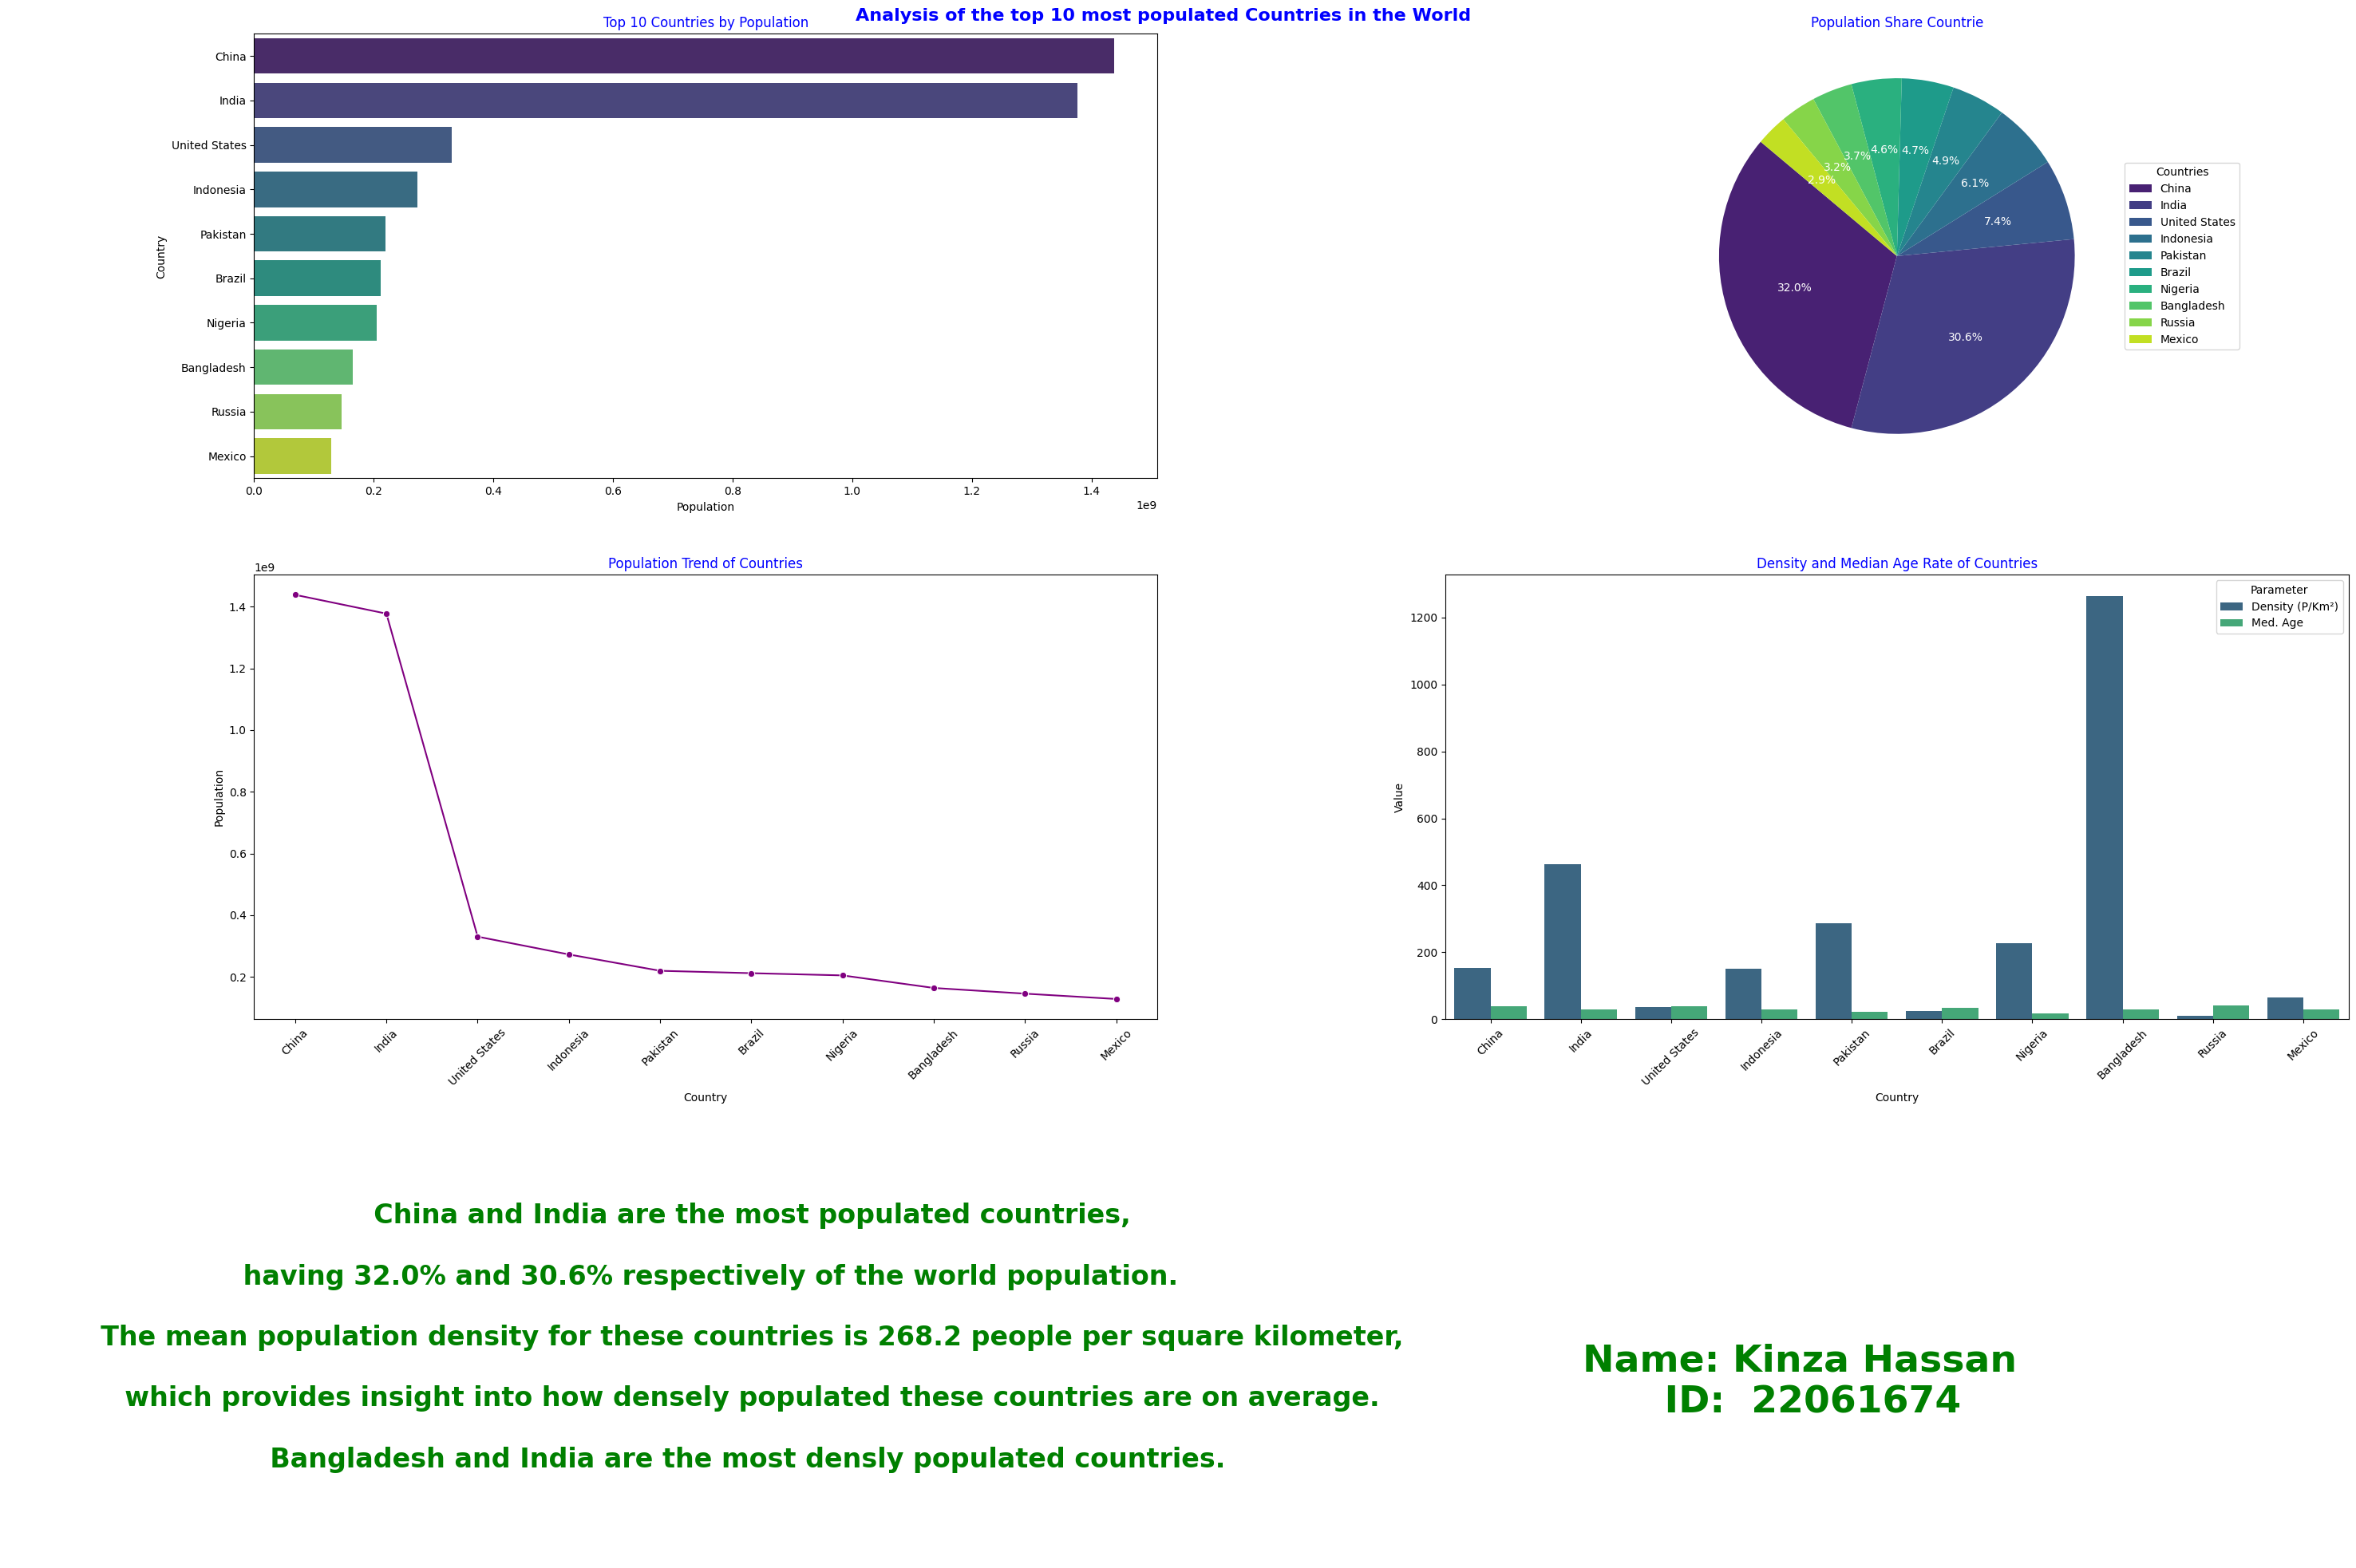

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
population_data = pd.read_csv('population_data.csv', encoding='utf-8')

# Convert 'Density (P/Km\u00b2)'  to numeric
population_data['Density (P/Km\u00b2)'] = pd.to_numeric(population_data['Density (P/Km\u00b2)'], errors='coerce')

# Med. Age
population_data['Med. Age'] = pd.to_numeric(population_data['Med. Age'], errors='coerce')

# Select the top 10 countries by population
top_countries = population_data.nlargest(10, 'Population (2020)')

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(30, 20))

# Bar chart for Population
sns.barplot(x='Population (2020)', y='Country (or dependency)', data=top_countries, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Top 10 Countries by Population', color='blue')
axs[0, 0].set_xlabel('Population')
axs[0, 0].set_ylabel('Country')

# Pie chart for Population
pie_colors = sns.color_palette('viridis', 10)
pie_wedges = axs[0, 1].pie(top_countries['Population (2020)'], labels=top_countries['Country (or dependency)'],
                            autopct='%1.1f%%', colors=pie_colors, startangle=140, textprops={'color':'white'})
axs[0, 1].set_title('Population Share Countrie', color='blue')
axs[0, 1].legend(pie_wedges[0], top_countries['Country (or dependency)'], title='Countries', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))


# Line chart for Population
sns.lineplot(x='Country (or dependency)', y='Population (2020)', data=top_countries, marker='o', ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Population Trend of Countries', color='blue')
axs[1, 0].set_xlabel('Country')
axs[1, 0].set_ylabel('Population')
axs[1, 0].tick_params(axis='x', rotation=45)

# Grouped bar chart for Density and Median Age
# We need to melt the dataframe to have 'variable' and 'value' columns for sns.barplot
melted_data = top_countries.melt(id_vars='Country (or dependency)', value_vars=['Density (P/Km\u00b2)', 'Med. Age'])
# Convert 'value' to numeric
melted_data['value'] = pd.to_numeric(melted_data['value'], errors='coerce')
sns.barplot(x='Country (or dependency)', y='value', hue='variable', data=melted_data, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Density and Median Age Rate of Countries', color='blue')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Value')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].legend(title='Parameter')

info = ("Name: Kinza Hassan \n ID:  22061674")

description = (
        """
          China and India are the most populated countries,\n\n having 32.0% and 30.6% respectively of the world population.\n
          The mean population density for these countries is 268.2 people per square kilometer,\n
          which provides insight into how densely populated these countries are on average.\n
          Bangladesh and India are the most densly populated countries.
        """
      )

# Chart Information
axs[2, 1].set_frame_on(False)
axs[2, 1].axis('off')
axs[2, 1].text(0.4, 0.4, info, ha='center', va='center', fontsize=34, fontweight='bold', color='green')

# Student Information
axs[2, 0].tick_params(axis='both', which='both', length=0)
axs[2, 0].set_frame_on(False)
axs[2, 0].axis('off')
axs[2, 0].text(0.5, 0.5, description, ha='center', va='center', fontsize=24, fontweight='bold', color='green')

# Title
fig.suptitle('Analysis of the top 10 most populated Countries in the World', fontsize=16, color='blue', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

fig.savefig('22061674.png', format='png', dpi=300)